# What are you ? - MBTI Personality Prediction

Myers-Briggs Type Indicator is a personality theory.

It aims at understanding how a person thinks and, basing on the results, assigning a person a type.

It has 4 metrics which can take any 1 of the two values to define a personality.

Hence MBTI defines 16 classes of personalities.

•	Introversion (I) – Extroversion (E)

•	Intuition (N) – Sensing (S)

•	Thinking (T) – Feeling (F)

•	Judging (J) – Perceiving (P)


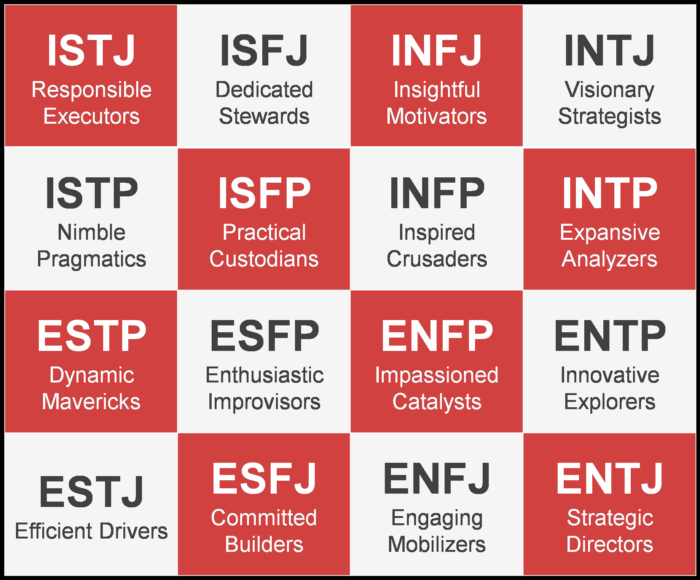

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Firstly lets assume that about 50 posts were needed to predict the personality.


In [2]:
df = pd.read_csv("mbti_1.csv")

In [3]:
df.dtypes

type     object
posts    object
dtype: object

type : Describes the mbti personality type of the person whose tweets have been collected.

posts : Collection of about 50 tweets of every person conjoined by '|||' 

In [4]:
df.index

RangeIndex(start=0, stop=8675, step=1)

Checking for missing values

In [5]:
missing_values_count = df.isnull().sum()
missing_values_count[:]

type     0
posts    0
dtype: int64

Checking how many datapoints represent the mbti types

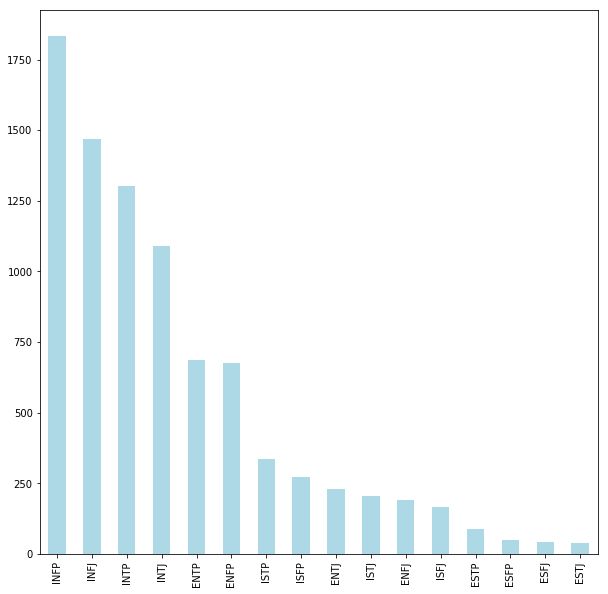

In [6]:
df['type'].value_counts().plot(kind='bar', color='lightblue',figsize=(10,10))

Observe one of the posts

In [7]:
[p.split('|||') for p in df.head(2).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

How many tweets of each person have been colected into posts...

In [8]:
dff = pd.DataFrame(df)

In [9]:
def count(inposts):
    return len(inposts.split('|||'))

In [10]:
dff['count'] = np.vectorize(count)(df['posts'])

In [11]:
dff

type                                              posts  count
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...     50
1     ENTP  'I'm finding the lack of me in these posts ver...     50
2     INTP  'Good one  _____   https://www.youtube.com/wat...     50
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...     50
4     ENTJ  'You're fired.|||That's another silly misconce...     50
5     INTJ  '18/37 @.@|||Science  is not perfect. No scien...     50
6     INFJ  'No, I can't draw on my own nails (haha). Thos...     50
7     INTJ  'I tend to build up a collection of things on ...     50
8     INFJ  I'm not sure, that's a good question. The dist...     50
9     INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...     50
10    INFJ  'One time my parents were fighting over my dad...     50
11    ENFJ  'https://www.youtube.com/watch?v=PLAaiKvHvZs||...     43
12    INFJ  'Joe santagato - ENTP|||ENFJ or  ENTP?   I'm n...     50
13    INTJ  'Fair enough, if that's how you want to look a...     50
14    INTP  'Basically this...  https://youtu.be/1pH5c1Jkh...     50
15    INTP  'Your comment screams INTJ, bro. Especially th...     50
16    INFJ  'some of these both excite and calm me:  BUTTS...     49
17    INFP  'I think we do agree. I personally don't consi...     50
18    INFJ  'I fully believe in the power of being a prote...     50
19    INFP  'That's normal, it happens also to me. If I am...     50
20    INTP  'Steve Job's was recognized for his striving f...     50
21    INFJ  'It is very annoying to be misinterpreted. Esp...     50
22    ENTJ  'Now I'm interested. But too lazy to go resear...     50
23    INFP  '45016 urh sorry uh. couldn't resist.|||all of...     28
24    ENTJ  'Still going strong at just over the two year ...     50
25    INFP  'Personally, I was thinking this would be more...     50
26    ENFP  'He doesn't want to go on the trip without me,...     50
27    ISFP  'They paint without numbers|||I'd guess at ist...     50
28    INFP  'Basically, my main questions are : What do yo...     48
29    INFJ  'I think that that can absolutely be true of i...     50
...    ...                                                ...    ...
8645  INFJ  'I play cello, and I'm also a classically trai...     50
8646  INFP  Its more or less based on how YOU experienced ...     50
8647  INTP  Socionics picked up on this.  They call it vis...     50
8648  INFP  'Good advice, thank you.|||I am in a tough sit...     50
8649  INFP  https://www.youtube.com/watch?v=nPDusM-75FE  e...     50
8650  INFJ  'I think the real question is whether INFJs ca...     50
8651  ISTP  '-Being alone -Being insensitive  -Over thinki...     50
8652  ISFJ  'Being assertive and standing up for myself is...     50
8653  INFP  'You should do whatever it is you want. If you...     50
8654  ISTJ  'Assuming I had a hand in it, I always at leas...     50
8655  INFJ  'I find that poster and your facial expression...     50
8656  INFJ  Rim  In some approximate order, it seems like ...     50
8657  INTJ  Social  1) Generally, I positively associate w...     50
8658  ESFJ  'Don't worry, I do that too when a car comes c...     50
8659  ENFP  'leoni I had really bad social anxiety until I...     50
8660  INFP  'I love the vastness of the sky, because my pr...     50
8661  ENTP  '**haven't logged in and read posts for over 6...     50
8662  INTJ  'I can't say I have any one specific belief. I...     50
8663  INTP  'doesn't matter, you don't have a choice, Elec...     50
8664  INTP  'https://www.youtube.com/watch?v=7zsMdi714mI||...     37
8665  ENTP  'This test wasn't even close on my gender, age...     50
8666  INTJ  'Highly recommend this to those who wants to t...     50
8667  ENTP  'I think generally people experience post trau...     50
8668  INTJ  'Here's a planned stress relieving activity th...     50
8669  INFJ  'I'm not sure about a method for picking out I...     50
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...     50
8671

Distribution of No. of words in each of the posts

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


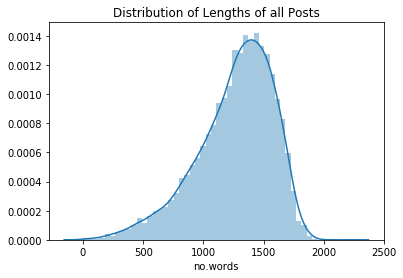

In [12]:
dff["no.words"] = df["posts"].apply(lambda x : len(x.split(' ')))
sns.distplot(dff["no.words"]).set_title("Distribution of Lengths of all Posts");

Total length of every collection posts : 

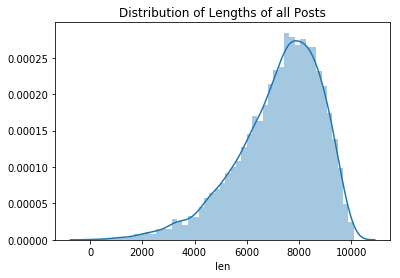

In [13]:
dff["len"] = df["posts"].apply(lambda x : len(x))
sns.distplot(dff["len"]).set_title("Distribution of Lengths of all Posts");

In [14]:
mbti_desc = {'I':'Introversion(I)', 'E':'Extroversion(E)', 
             'N':'Intuition(N)', 'S':'Sensing(S)', 
             'T':'Thinking(T)', 'F': 'Feeling(F)', 
             'J':'Judging(J)', 'P': 'Perceiving(P)'}

In [15]:
dff['percent'] = dff['count']/dff['count'].sum()
dff['description'] = dff['type'].apply(lambda x: ' '.join([mbti_desc[l] for l in list(x)]))
dff.head(5)

type                                              posts  count  no.words  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...     50       578   
1  ENTP  'I'm finding the lack of me in these posts ver...     50      1194   
2  INTP  'Good one  _____   https://www.youtube.com/wat...     50       869   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...     50      1101   
4  ENTJ  'You're fired.|||That's another silly misconce...     50       987   

    len   percent                                        description  
0  4652  0.000118  Introversion(I) Intuition(N) Feeling(F) Judgin...  
1  7053  0.000118  Extroversion(E) Intuition(N) Thinking(T) Perce...  
2  5265  0.000118  Introversion(I) Intuition(N) Thinking(T) Perce...  
3  6271  0.000118  Introversion(I) Intuition(N) Thinking(T) Judgi...  
4  6111  0.000118  Extroversion(E) Intuition(N) Thinking(T) Judgi...

In [16]:
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline

In [17]:
def get_types(row):
    t=row['type']

    I = 0; N = 0;T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 


The first Letter is represented as 1 else 0.

In [18]:
type_class = dff.apply (lambda row: get_types (row),axis=1)
type_class.head(8)

IE  NS  TF  JP
0   1   1   0   1
1   0   1   1   0
2   1   1   1   0
3   1   1   1   1
4   0   1   1   1
5   1   1   1   1
6   1   1   0   1
7   1   1   1   1

In [19]:
print("Introversion (I) /  Extroversion (E):\t", type_class['IE'].value_counts()[0], " / ", type_class['IE'].value_counts()[1])
print("Intuition (N) – Sensing (S):\t\t", type_class['NS'].value_counts()[0], " / ", type_class['NS'].value_counts()[1])
print("Thinking (T) – Feeling (F):\t\t", type_class['TF'].value_counts()[0], " / ", type_class['TF'].value_counts()[1])
print("Judging (J) – Perceiving (P):\t\t", type_class['JP'].value_counts()[0], " / ", type_class['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) – Sensing (S):		 1197  /  7478
Thinking (T) – Feeling (F):		 4694  /  3981
Judging (J) – Perceiving (P):		 5241  /  3434


The above is the representation of a particular trait in the dataset.

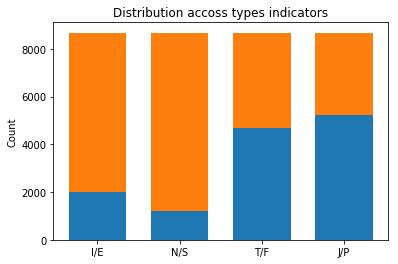

In [20]:
N = 4
but = (type_class['IE'].value_counts()[0], type_class['NS'].value_counts()[0], type_class['TF'].value_counts()[0], type_class['JP'].value_counts()[0])
top = (type_class['IE'].value_counts()[1], type_class['NS'].value_counts()[1], type_class['TF'].value_counts()[1], type_class['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

## Data Preprocessing

All the punctuation marks and stop words are removed for they have no impact on predicting the personality type of a person.

In [21]:
import re

In [22]:
def cleanPosts( posts ) :
    posts = re.sub( r'\|\|\|', r' ', posts ) 
    phrase = re.sub( r'http\S+', r'', posts )
    # dealing specific contractions
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # dealing general contractions
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    posts = re.sub(r"\'m", " am", phrase)
    posts = re.sub( r'(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\@)|(\_)|(\-)|(\+)|(\*)|(\/)|(\#)|(\&)|(\$)|(\{)|(\})','', posts )
    posts = posts.lower()
    return posts

In [23]:
df.iloc[2,1]

"'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the last 3

In [24]:
cleanPosts(df.iloc[2,1])

'good one      of course to which i say i know that is my blessing and my curse does being absolutely positive that you and your best friend could be an amazing couple count if so than yes   or it is more i could be madly in love in case i reconciled my feelings which at no i did not thank you for a link socalled tisi loop and it can stem from any current topicobsession can be deadly it is like when you are stuck in your own thoughts and your mind just wanders in circles feels truly terrible  have you noticed how peculiar vegetation can be all you have to do is look down at the grass dozens of different plant species there    and now imagine that hundreds of years later whenif soil the smiths – never had no one ever i often find myself spotting faces on marble tileswood this  yearold sentence is an incredibly accurate and beautiful description i have not visited this website in the last  years so whoever reads this and maybe even remembers me which i highly doubt hi     when you sit in

Now applying it to all the posts...

In [25]:
df['clean_posts'] = df['posts'].apply(cleanPosts)

In [26]:
df = df.drop(['count','percent','description'],axis=1)

In [27]:
dff.head(5)

type                                              posts  count  no.words  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...     50       578   
1  ENTP  'I'm finding the lack of me in these posts ver...     50      1194   
2  INTP  'Good one  _____   https://www.youtube.com/wat...     50       869   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...     50      1101   
4  ENTJ  'You're fired.|||That's another silly misconce...     50       987   

    len   percent                                        description  
0  4652  0.000118  Introversion(I) Intuition(N) Feeling(F) Judgin...  
1  7053  0.000118  Extroversion(E) Intuition(N) Thinking(T) Perce...  
2  5265  0.000118  Introversion(I) Intuition(N) Thinking(T) Perce...  
3  6271  0.000118  Introversion(I) Intuition(N) Thinking(T) Judgi...  
4  6111  0.000118  Extroversion(E) Intuition(N) Thinking(T) Judgi...

In [28]:
df.head(5)

type                                              posts  no.words   len  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...       578  4652   
1  ENTP  'I'm finding the lack of me in these posts ver...      1194  7053   
2  INTP  'Good one  _____   https://www.youtube.com/wat...       869  5265   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...      1101  6271   
4  ENTJ  'You're fired.|||That's another silly misconce...       987  6111   

                                         clean_posts  
0    enfp and intj moments    sportscenter not to...  
1  i am finding the lack of me in these posts ver...  
2  good one      of course to which i say i know ...  
3  dear intp   i enjoyed our conversation the oth...  
4  you are fired that is another silly misconcept...

In [29]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Janu&Vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Janu&Vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
# We want to remove these from the posts
type_list = ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp',
       'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")

#Final list of stop words
cachedStopWords.extend(type_list)

In [32]:
cachedStopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Tokenize the posts and lemmatize the produced tokens...

In [33]:
tokenized_data = df['clean_posts'].apply( lambda x : x.split())#nltk.word_tokenize(x)
tokenized_data.head(5)

0    [enfp, and, intj, moments, sportscenter, not, ...
1    [i, am, finding, the, lack, of, me, in, these,...
2    [good, one, of, course, to, which, i, say, i, ...
3    [dear, intp, i, enjoyed, our, conversation, th...
4    [you, are, fired, that, is, another, silly, mi...
Name: clean_posts, dtype: object

In [34]:
token_list = tokenized_data.apply(lambda token : for i in token if i not in cachedStopWords)

SyntaxError: invalid syntax (<ipython-input-34-08afbbc79a1e>, line 1)

In [35]:
lemm_data = tokenized_data.apply( lambda x : [lemmatiser.lemmatize(i) for i in x])

In [36]:
lemm_data.head(5)

0    [enfp, and, intj, moment, sportscenter, not, t...
1    [i, am, finding, the, lack, of, me, in, these,...
2    [good, one, of, course, to, which, i, say, i, ...
3    [dear, intp, i, enjoyed, our, conversation, th...
4    [you, are, fired, that, is, another, silly, mi...
Name: clean_posts, dtype: object

In [37]:
lemm_data.shape

(8675,)

In [38]:
lemmatized_data = []
for i in range(len(lemm_data)):
    lemmatized_data.append(' '.join(lemm_data[i]))

lemmatized_data

['enfp and intj moment sportscenter not top ten play prank what ha been the most lifechanging experience in your life on repeat for most of today may the perc experience immerse you the last thing my infj friend posted on his facebook before committing suicide the next day rest in peace~ hello enfj sorry to hear of your distress it is only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard time a time of growth a welcome and stuff game set match prozac wellbrutin at least thirty minute of moving your leg and i do not mean moving them while sitting in your same desk chair weed in moderation maybe try edible a a healthier alternative basically come up with three item you have determined that each type or whichever type you want to do would more than likely use given each type cognitive function and whatnot when left by all thing in moderation sims is indeed a video game and a good one at that note a good one at that is somewha

In [39]:
type(lemmatized_data)

list

In [40]:
len(lemmatized_data)

8675

In [41]:
df['Cleaned_Posts'] = np.array(lemmatized_data).reshape(-1,1)

In [42]:
def preprocessing(text):
    #text = text.decode("utf8")
    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in cachedStopWords]

    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]

    # lower capitalization
    tokens = [word.lower() for word in tokens]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text 

In [43]:
df['Cleaned_posts'] = df['clean_posts'].apply( lambda text : preprocessing(text))

In [44]:
df.head(5)

type                                              posts  no.words   len  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...       578  4652   
1  ENTP  'I'm finding the lack of me in these posts ver...      1194  7053   
2  INTP  'Good one  _____   https://www.youtube.com/wat...       869  5265   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...      1101  6271   
4  ENTJ  'You're fired.|||That's another silly misconce...       987  6111   

                                         clean_posts  \
0    enfp and intj moments    sportscenter not to...   
1  i am finding the lack of me in these posts ver...   
2  good one      of course to which i say i know ...   
3  dear intp   i enjoyed our conversation the oth...   
4  you are fired that is another silly misconcept...   

                                       Cleaned_Posts  \
0  enfp and intj moment sportscenter not top ten ...   
1  i am finding the lack of me in these post very...   
2  good one of course to which i say i know that ...   
3  dear intp i enjoyed our conversation the other...   
4  you are fired that is another silly misconcept...   

                                       Cleaned_posts  
0  moment sportscenter top ten play prank lifecha...  
1  finding lack post alarming sex boring position...  
2  good one course say know blessing curse absolu...  
3  dear enjoyed conversation day esoteric gabbing...  
4  fired another silly misconception approaching ...

In [45]:
mbti = pd.DataFrame(df[['Cleaned_posts','type']])
mbti.head(5)

Cleaned_posts  type
0  moment sportscenter top ten play prank lifecha...  INFJ
1  finding lack post alarming sex boring position...  ENTP
2  good one course say know blessing curse absolu...  INTP
3  dear enjoyed conversation day esoteric gabbing...  INTJ
4  fired another silly misconception approaching ...  ENTJ

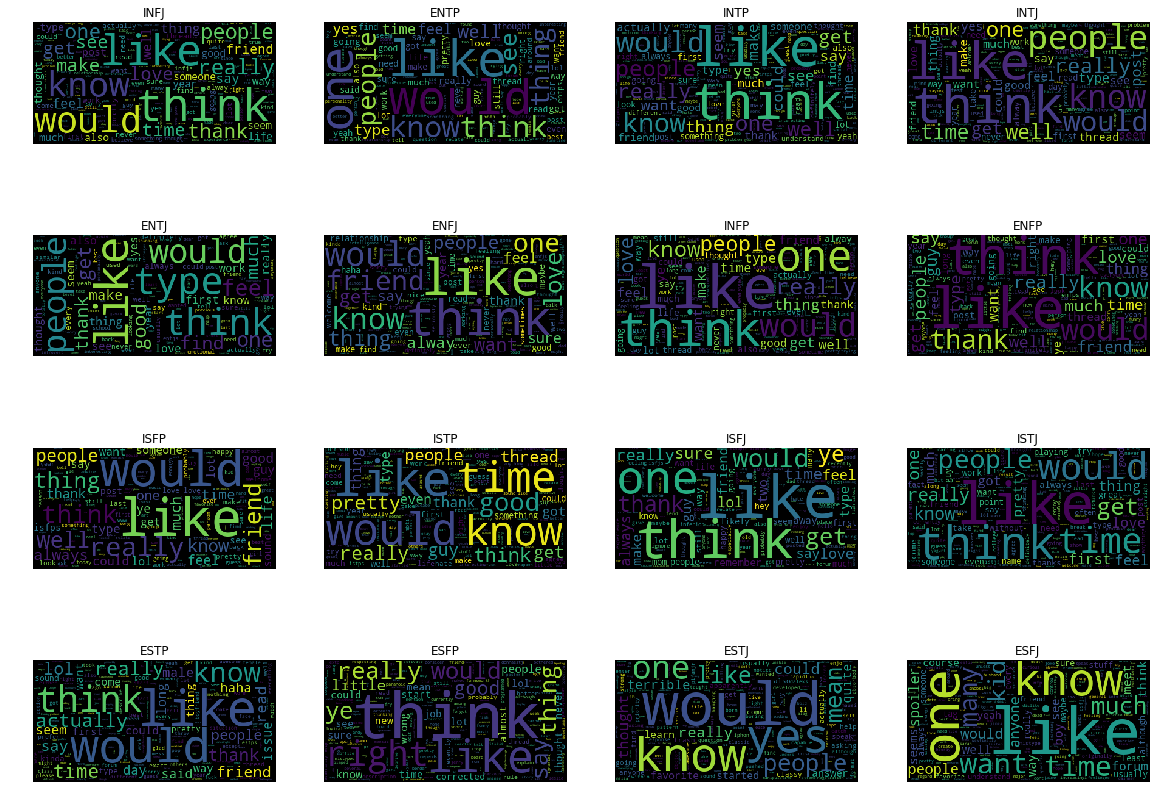

In [46]:
from wordcloud import WordCloud

# stopwords to not consider
labels = mbti['type'].unique()
row, col = 4, 4
wc = WordCloud(stopwords = cachedStopWords)

fig, ax = plt.subplots(4, 4, figsize=(20,15))

for i in range(4):
    for j in range(4):
        cur_type = labels[i*col+j]
        cur_ax = ax[i][j]
        df = mbti[mbti['type'] == cur_type]
        wordcloud = wc.generate(df['Cleaned_posts'].to_string())
        cur_ax.imshow(wordcloud)
        cur_ax.axis('off')
        cur_ax.set_title(cur_type)

In [72]:
posts = mbti['Cleaned_posts']
ptype = mbti['type']

In [73]:
posts.shape , ptype.shape

((8675,), (8675,))

In [74]:
type(posts) , type(ptype)

(pandas.core.series.Series, pandas.core.series.Series)

One hot Encoding of posts  and ptype i.e. vectorisation

In [75]:
from sklearn.decomposition import TruncatedSVD

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
posts.shape , ptype.shape

((8675,), (8675,))

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
# cntf = CountVectorizer(#ngram_range=(1, 3), 
#                         stop_words=cachedStopWords,
#                         max_features = 7000)

In [111]:
tfidf = TfidfVectorizer(#ngram_range=(1, 3), 
                        stop_words=cachedStopWords,
                        max_features = 7000)
    
#                           max_features = 7000, vocabulary = cntf.vocabulary


In [112]:
# cntfposts = cntf.fit_transform(posts)

In [113]:
tfposts = tfidf.fit_transform(posts)

In [114]:
tfposts

<8675x7000 sparse matrix of type '<class 'numpy.float64'>'
	with 2959492 stored elements in Compressed Sparse Row format>

In [115]:
tsvd = TruncatedSVD(n_components=500)
tposts = tsvd.fit_transform(tfposts)

In [116]:
tposts.shape

(8675, 500)

In [117]:
ptype = pd.get_dummies(ptype)

In [118]:
ptype.loc[0]

ENFJ    0
ENFP    0
ENTJ    0
ENTP    0
ESFJ    0
ESFP    0
ESTJ    0
ESTP    0
INFJ    1
INFP    0
INTJ    0
INTP    0
ISFJ    0
ISFP    0
ISTJ    0
ISTP    0
Name: 0, dtype: uint8

Splitting the Dataset : for training and testing purposes

In [119]:
x_train, x_test, y_train, y_test = train_test_split(tposts, ptype, test_size=0.1, stratify=ptype, random_state=42)

In [120]:
x_train.shape , y_train.shape

((7807, 500), (7807, 16))

In [121]:
x_test.shape , y_test.shape

((868, 500), (868, 16))

Building the Neural Network Sequential Model from Keras API

In [207]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

In [208]:
y_train.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [209]:
#model architecture
model = Sequential([Dense(321, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape = (x_train[0].shape)),#,kernel_regularizer=regularizers.l1(0.01)
                    Dropout(0.5, noise_shape=None, seed=None),
                    Dense(152, activation='relu'),# 
                    Dropout(0.5, noise_shape=None, seed=None),
                    #Dense(51, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                    #Dropout(0.5, noise_shape=None, seed=None),
                    Dense(16, activation='softmax')])


In [210]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 321)               160821    
_________________________________________________________________
dropout_9 (Dropout)          (None, 321)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 152)               48944     
_________________________________________________________________
dropout_10 (Dropout)         (None, 152)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                2448      
Total params: 212,213
Trainable params: 212,213
Non-trainable params: 0
_________________________________________________________________


In [211]:
adam = keras.optimizers.adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = adam,
              metrics = ['accuracy'])

Training the model

In [212]:
history = model.fit( x_train , y_train , epochs = 30, validation_split = 0.2 , verbose=2)

Train on 6245 samples, validate on 1562 samples
Epoch 1/30
 - 3s - loss: 2.9086 - acc: 0.2002 - val_loss: 2.2512 - val_acc: 0.2535
Epoch 2/30
 - 2s - loss: 2.2342 - acc: 0.2777 - val_loss: 2.1335 - val_acc: 0.3246
Epoch 3/30
 - 2s - loss: 2.1530 - acc: 0.3406 - val_loss: 2.0863 - val_acc: 0.3534
Epoch 4/30
 - 2s - loss: 2.1077 - acc: 0.3693 - val_loss: 2.0630 - val_acc: 0.3937
Epoch 5/30
 - 2s - loss: 2.0677 - acc: 0.3949 - val_loss: 2.0369 - val_acc: 0.4155
Epoch 6/30
 - 2s - loss: 2.0492 - acc: 0.4131 - val_loss: 2.0184 - val_acc: 0.4193
Epoch 7/30
 - 2s - loss: 2.0281 - acc: 0.4282 - val_loss: 2.0012 - val_acc: 0.4443
Epoch 8/30
 - 2s - loss: 2.0031 - acc: 0.4461 - val_loss: 1.9839 - val_acc: 0.4533
Epoch 9/30
 - 2s - loss: 1.9936 - acc: 0.4498 - val_loss: 1.9690 - val_acc: 0.4520
Epoch 10/30
 - 2s - loss: 1.9723 - acc: 0.4679 - val_loss: 1.9794 - val_acc: 0.4558
Epoch 11/30
 - 2s - loss: 1.9546 - acc: 0.4665 - val_loss: 1.9534 - val_acc: 0.4693
Epoch 12/30
 - 2s - loss: 1.9437 - ac

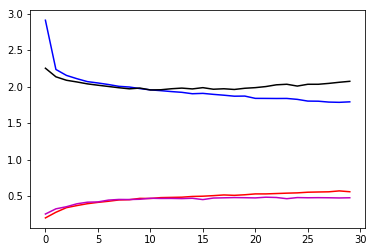

In [213]:
plt.plot(history.epoch, history.history['loss'], 'b',
         history.epoch, history.history['val_loss'], 'k',
        history.epoch, history.history['acc'], 'r',
         history.epoch, history.history['val_acc'], 'm'
        )

[Loss and Accuracy] over the test data

In [214]:
model.evaluate(x_test, y_test)

868/868 [==============================] - 0s 126us/step


[2.1464429835570025, 0.43548387096774194]

Prediction using the final model : 

In [215]:
my_posts  = """ The future of education is "community driven organised self-learning". Define your learning goals and use the collective intelligence of the internet to derive the best curriculum for you. A unique curriculum for each of us.
                I love how elaborate and comprehensive HackerNews threads can get about technical topics. Spending 30 mins reading through a thread can introduce you to far more diverse ideas in application development than entire books do in 300 pages.
"""

Data Preprocessing the posts...

In [216]:
my_clean_posts = cleanPosts( my_posts ) 

In [217]:
my_clean_posts

' the future of education is community driven organised selflearning define your learning goals and use the collective intelligence of the internet to derive the best curriculum for you a unique curriculum for each of us\n                i love how elaborate and comprehensive hackernews threads can get about technical topics spending  mins reading through a thread can introduce you to far more diverse ideas in application development than entire books do in  pages\n'

In [218]:
my_clean_posts = re.sub( r'\n', r' ', my_clean_posts ) 
my_clean_posts = re.sub( r'%', r'', my_clean_posts ) 
my_clean_posts = re.sub( r'\“', r'', my_clean_posts ) 
my_clean_posts = re.sub( r'\’', r'', my_clean_posts )

In [219]:
my_clean_posts

' the future of education is community driven organised selflearning define your learning goals and use the collective intelligence of the internet to derive the best curriculum for you a unique curriculum for each of us                 i love how elaborate and comprehensive hackernews threads can get about technical topics spending  mins reading through a thread can introduce you to far more diverse ideas in application development than entire books do in  pages '

In [220]:
tokenised_posts = my_clean_posts.split()

In [221]:
tokenised_posts

['the',
 'future',
 'of',
 'education',
 'is',
 'community',
 'driven',
 'organised',
 'selflearning',
 'define',
 'your',
 'learning',
 'goals',
 'and',
 'use',
 'the',
 'collective',
 'intelligence',
 'of',
 'the',
 'internet',
 'to',
 'derive',
 'the',
 'best',
 'curriculum',
 'for',
 'you',
 'a',
 'unique',
 'curriculum',
 'for',
 'each',
 'of',
 'us',
 'i',
 'love',
 'how',
 'elaborate',
 'and',
 'comprehensive',
 'hackernews',
 'threads',
 'can',
 'get',
 'about',
 'technical',
 'topics',
 'spending',
 'mins',
 'reading',
 'through',
 'a',
 'thread',
 'can',
 'introduce',
 'you',
 'to',
 'far',
 'more',
 'diverse',
 'ideas',
 'in',
 'application',
 'development',
 'than',
 'entire',
 'books',
 'do',
 'in',
 'pages']

In [222]:
len(tokenised_posts)

71

In [223]:
lemm_posts = [lemmatiser.lemmatize(i) for i in tokenised_posts]

In [224]:
lemm_posts

['the',
 'future',
 'of',
 'education',
 'is',
 'community',
 'driven',
 'organised',
 'selflearning',
 'define',
 'your',
 'learning',
 'goal',
 'and',
 'use',
 'the',
 'collective',
 'intelligence',
 'of',
 'the',
 'internet',
 'to',
 'derive',
 'the',
 'best',
 'curriculum',
 'for',
 'you',
 'a',
 'unique',
 'curriculum',
 'for',
 'each',
 'of',
 'u',
 'i',
 'love',
 'how',
 'elaborate',
 'and',
 'comprehensive',
 'hackernews',
 'thread',
 'can',
 'get',
 'about',
 'technical',
 'topic',
 'spending',
 'min',
 'reading',
 'through',
 'a',
 'thread',
 'can',
 'introduce',
 'you',
 'to',
 'far',
 'more',
 'diverse',
 'idea',
 'in',
 'application',
 'development',
 'than',
 'entire',
 'book',
 'do',
 'in',
 'page']

In [225]:
len(lemm_posts)

71

In [226]:
lemm_posts[0]

'the'

In [236]:
myposts =preprocessing(my_posts)

In [237]:
myposts

'the future education community driven organised self-learning define learning goal use collective intelligence internet derive best curriculum unique curriculum love elaborate comprehensive hackernews thread get technical topic spending min reading thread introduce far diverse idea application development entire book 300 page'

In [238]:
tfmyposts = tfidf.transform([myposts])

In [239]:
tfmyposts

<1x7000 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [240]:
mypoststf = tsvd.transform(tfmyposts)

In [241]:
mypoststf.shape

(1, 500)

Predicting the personality based on the processed posts....

In [242]:
y_pred = model.predict_classes(mypoststf)
y_pred

array([10], dtype=int64)

In [243]:
personality_dict = {0:"""ENFJ - ENGAGING MOBILISERS (The Giver) \n 
                    Popular and sensitive, with outstanding people skills.\n 
                    Externally focused, with real concern for how others think and feel.\n 
                    Usually dislike being alone.\n They see everything from the human angle, and dislike impersonal analysis.\n
                    Very effective at managing people issues, and leading group discussions.\n 
                    Interested in serving others, and probably place the needs of others over their own needs.""",
                1:"""ENFP - IMPASSIONED CATALYSTS  (The Inspirer)\n
                    Enthusiastic, idealistic, and creative.\n
                    Able to do almost anything that interests them.\n
                    Great people skills.\n
                    Need to live life in accordance with their inner values.\n
                    Excited by new ideas, but bored with details.\n
                    Open-minded and flexible, with a broad range of interests and abilities.
                  """,
                2:"""ENTJ - STRATEGIC DIRECTORS  (The Executive)\n
                    Assertive and outspoken - they are driven to lead.\n
                    Excellent ability to understand difficult organizational problems and create solid solutions. \n
                    Intelligent and well-informed, they usually excel at public speaking.\n
                    They value knowledge and competence, and usually have little patience with inefficiency or disorganization.
                 """,
                3:"""ENTP - INNOVATIVE EXPLORERS  (The Visionary)\n
                     Creative, resourceful, and intellectually quick.\n
                    Good at a broad range of things.\n 
                    Enjoy debating issues, and may be into "one-up-manship".\n 
                    They get very excited about new ideas and projects, but may neglect the more routine aspects of life.\n 
                    Generally outspoken and assertive.\n They enjoy people and are stimulating company.\n 
                    Excellent ability to understand concepts and apply logic to find solutions.
                """,
                4:"""ESFJ - COMMITED BUILDERS  (The Caregiver)\n
                    Warm-hearted, popular, and conscientious.\n
                    Tend to put the needs of others over their own needs.\n
                    Feel strong sense of responsibility and duty. Value traditions and security.\n
                    Interested in serving others.\n
                    Need positive reinforcement to feel good about themselves.\n
                    Well-developed sense of space and function.
                """,
                5:"""
                ESFP - ENTHUSIASTIC IMPROVISORS  (The Performer)\n
                People-oriented and fun-loving, they make things more fun for others by their enjoyment.
                \n Living for the moment, they love new experiences.
                \n They dislike theory and impersonal analysis.
                \n Interested in serving others.
                \n Likely to be the center of attention in social situations.
                \n Well-developed common sense and practical ability.
                """,
                6:"""ESTJ - EFFICIENT DRIVERS  (The Guardian)\n
                    Practical, traditional, and organized.\n
                    Likely to be athletic.\n
                    Not interested in theory or abstraction unless they see the practical application.\n
                    Have clear visions of the way things should be.\n
                    Loyal and hard-working.\n
                    Like to be in charge.\n
                    Exceptionally capable in organizing and running activities.\n
                    "Good citizens" who value security and peaceful living.
                """,
                7:"""ESTP - DYNAMIC MAVERICKS (The Doer)\n
                    Friendly, adaptable, action-oriented.\n
                    "Doers" who are focused on immediate results.\n
                    Living in the here-and-now, they're risk-takers who live fast-paced lifestyles.\n
                    Impatient with long explanations.\n
                    Extremely loyal to their peers, but not usually respectful of laws and rules if they get in the way of getting things done.\n
                    Great people skills.
                """,
                8:"""INFJ - INSIGHTFUL MOTIVATORS (The Protector)\n
                    Quietly forceful, original, and sensitive.\n
                    Tend to stick to things until they are done.\n
                    Extremely intuitive about people, and concerned for their feelings.\n
                    Well-developed value systems which they strictly adhere to.\n
                    Well-respected for their perserverence in doing the right thing.\n
                    Likely to be individualistic, rather than leading or following.
                """,
                9:"""INFP - INSPIRED CRUSADERS  (The Idealist)\n
                    Quiet, reflective, and idealistic.\n
                    Interested in serving humanity.\n
                    Well-developed value system, which they strive to live in accordance with.\n
                    Extremely loyal.\n
                    Adaptable and laid-back unless a strongly-held value is threatened.\n
                    Usually talented writers.\n
                    Mentally quick, and able to see possibilities.\n
                    Interested in understanding and helping people.
                """,
                10:"""INTJ - VISIONARY STRATEGISTS  (The Scientist)\n
                    Independent, original, analytical, and determined.\n
                    Have an exceptional ability to turn theories into solid plans of action.\n
                    Highly value knowledge, competence, and structure.\n
                    Driven to derive meaning from their visions.\n
                    Long-range thinkers.\n
                    Have very high standards for their performance, and the performance of others.\n
                    Natural leaders, but will follow if they trust existing leaders.
                """,
                11:"""INTP - EXPANSIVE ANALYSERS  (The Thinker)\n
                    Logical, original, creative thinkers.\n
                    Can become very excited about theories and ideas.\n
                    Exceptionally capable and driven to turn theories into clear understandings.\n
                    Highly value knowledge, competence and logic.\n
                    Quiet and reserved, hard to get to know well.\n
                    Individualistic, having no interest in leading or following others.
                """,
                12:"""ISFJ - DEDICATED STEWARDS  (The Nurturer)\n
                    Quiet, kind, and conscientious.\n
                    Can be depended on to follow through.\n
                    Usually puts the needs of others above their own needs.\n
                    Stable and practical, they value security and traditions.\n
                    Well-developed sense of space and function.\n
                    Rich inner world of observations about people.\n
                    Extremely perceptive of other's feelings.\n
                    Interested in serving others.
                """,
                13:"""ISFP - PRACTICAL CUSTODIANS  (The Artist)\n
                    Quiet, serious, sensitive and kind.\n
                    Do not like conflict, and not likely to do things which may generate conflict.\n
                    Loyal and faithful.\n
                    Extremely well-developed senses, and aesthetic appreciation for beauty.\n
                    Not interested in leading or controlling others.\n
                    Flexible and open-minded.\n
                    Likely to be original and creative.\n
                    Enjoy the present moment.
                """,
                14:"""ISTJ - RESPLONSIBLE EXECUTORS (The Duty Fulfiller)\n
                    Serious and quiet, interested in security and peaceful living.\n
                    Extremely thorough, responsible, and dependable.\n
                    Well-developed powers of concentration.\n
                    Usually interested in supporting and promoting traditions and establishments.\n
                    Well-organized and hard working, they work steadily towards identified goals.\n
                    They can usually accomplish any task once they have set their mind to it.
                """,
                15:"""ISTP - NIMBLE PRAGMATICS (The Mechanic)\n
                    Quiet and reserved, interested in how and why things work.\n
                    Excellent skills with mechanical things.\n
                    Risk-takers who they live for the moment.\n
                    Usually interested in and talented at extreme sports.\n
                    Uncomplicated in their desires.\n
                    Loyal to their peers and to their internal value systems, but not overly concerned with respecting laws and rules if they get in the way of getting something done.\n
                    Detached and analytical, they excel at finding solutions to practical problems.
                """
               }

In [244]:
print(personality_dict[y_pred[0]])

INTJ - VISIONARY STRATEGISTS  (The Scientist)

                    Independent, original, analytical, and determined.

                    Have an exceptional ability to turn theories into solid plans of action.

                    Highly value knowledge, competence, and structure.

                    Driven to derive meaning from their visions.

                    Long-range thinkers.

                    Have very high standards for their performance, and the performance of others.

                    Natural leaders, but will follow if they trust existing leaders.
                
